In [82]:
#Import packages
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import fiona
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw' #The driver required to read 'KML' files

In [92]:
#Read in the data as a pd dataframe
seismic_data = pd.read_csv('all_month.csv')
earthquake_mask = seismic_data['type'] == 'earthquake'
earthquake_data = seismic_data[earthquake_mask]

#Seismic dataframe to geodataframe converting longitude and latidude to point (geometry object) only for earthquakes
earthquakes = gpd.GeoDataFrame(earthquake_data, geometry=gpd.points_from_xy(earthquake_data.longitude, earthquake_data.latitude))

#Tectonic plate boundaries as a geopandas dataframe
plates_path = "plate-boundaries/doc.kml"
plates = gpd.read_file(plates_path, driver="KML")

#World as a geopandas data frame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

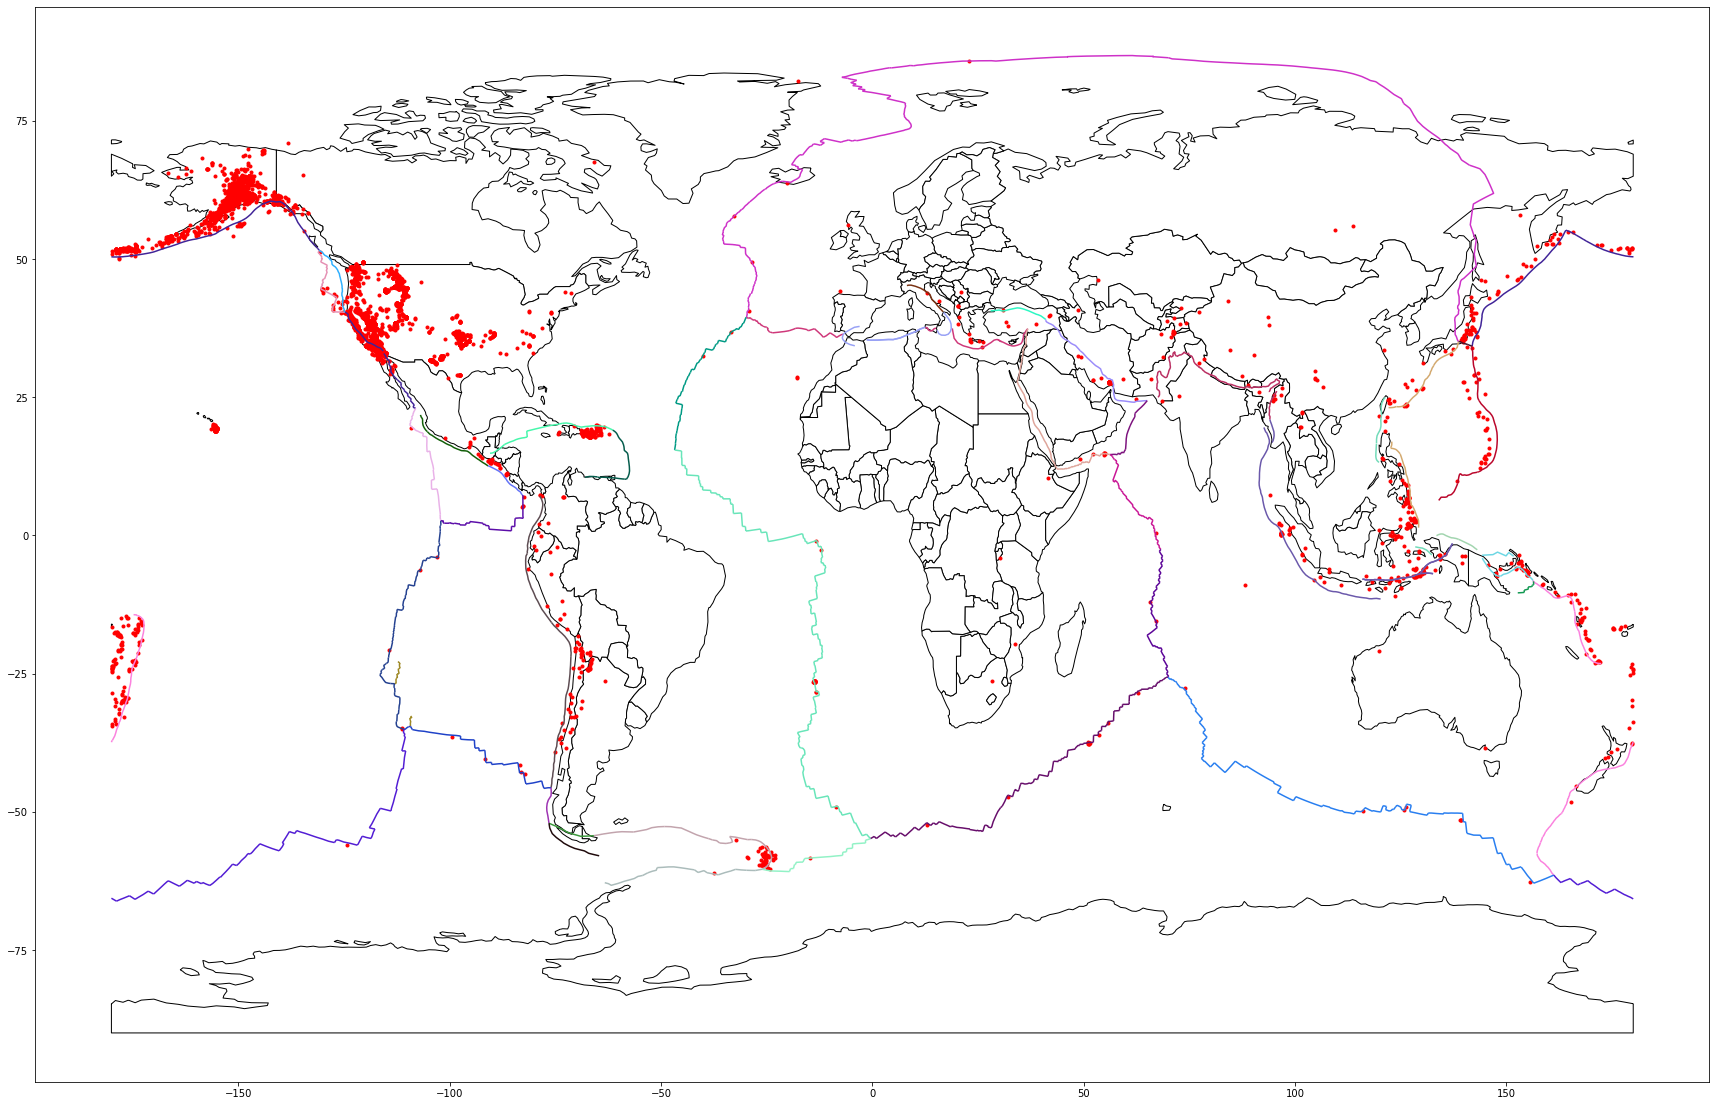

In [84]:
#Initialise figure (create empty figure)
fig, ax = plt.subplots(1, 1, figsize=(30,30))
#Plots the world from the geodataframe (plots the geometry column by default)
world.plot(ax=ax, color='white', edgecolor = 'black')

#Plots the earthquakes from the geodataframe
earthquakes.plot(ax=ax, color='red', marker='.')

# Creates array of uniques plate names, creates random list of colors, loops over geodataframe plotting each platename a different random colour
plate_names = plates.Name.unique()
rand_color_list = [ "#%06x" % random.randint(0, 0xFFFFFF) for color in range(len(plate_names))]
for index, plate in enumerate(plate_names):
    mask = plates['Name'] == plate
    plates[mask].plot(ax=ax, color=rand_color_list[index])

In [36]:
earthquakes()

['Oceania',
 'Africa',
 'North America',
 'Asia',
 'South America',
 'Europe',
 'Seven seas (open ocean)',
 'Antarctica']

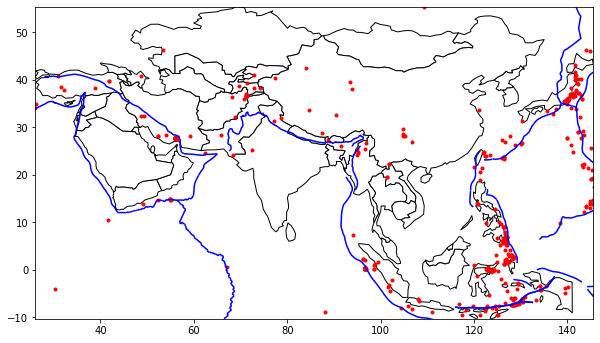

In [89]:
def earthquake_map_by_continent(world, earthquakes, plates):
    continent_names = world.continent.unique()
    continent_number = input("Input the number correspnding to the continent you'd like to map {}".format(list(enumerate(continent_names))))
    continent_selected = continent_names[int(continent_number)]
    continent_gdf = world[world.continent == continent_selected]
    aoi_bounds = continent_gdf.geometry.total_bounds
    xmin, ymin, xmax, ymax = aoi_bounds
    
    fig, ax = plt.subplots(1,1, figsize = (10,10))
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    continent_gdf.plot(ax=ax, color='white', edgecolor = 'black')
    earthquakes.plot(ax=ax, color='red', marker='.')
    plates.plot(ax=ax, color='blue')



earthquake_map_by_continent(world, earthquakes, plates)

In [64]:
#Histogram of the magnitudes
earthquakes['mag'].describe()


count    9358.000000
mean        1.651303
std         1.207933
min        -1.210000
25%         0.850000
50%         1.450000
75%         2.090000
max         6.600000
Name: mag, dtype: float64

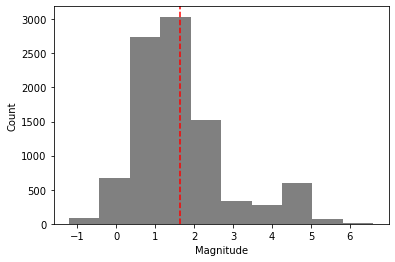

In [73]:
plt.hist(earthquakes['mag'], color='grey')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.axvline(earthquakes['mag'].mean(), ls='--', color='red')